# Introduction to Python and Space-Time Data

*Space-Time Analytics — Lecture 2a*

* **Prof. Carson J. Q. Farmer**  
    <i class="fa-fw fa fa-twitter"></i> [@carsonfarmer](https://twitter.com/carsonfarmer)  
    <i class="fa-fw fa fa-globe"></i> [carsonfarmer.com](https://carsonfarmer.com)  
    <i class="fa-fw fa fa-envelope-o"></i> [carson.farmer@colorado.edu](mailto:carson.farmer@colorado.edu)  
    <i class="fa-fw fa fa-github-alt"></i> [github.com/carsonfarmer](https://github.com/carsonfarmer)  
    <i class="fa-fw fa fa-briefcase"></i> Guggenheim Building Room 207  
    <i class="fa-fw fa fa-clock-o"></i> Wednesdays 2:00-3:00 PM and 4:15-5:15 PM  

## Today

* Some administrative items...
* Technical details...  
    <i class="fa-fw fa fa-book"></i> `jupyter` Notebooks  
    🐍 Introduction to `Python`  
    <i class="fa-fw fa fa-table"></i> Data Frames & Time-Series  
* Time and Time-Series'
* Start on this week's lab

## Administrative Items

* We're all going to create [`GitHub`](https://github.com/) accounts
* We're all going to download some stuff from GitHub
* Also, let's make sure we all have a paper to present!

<img style="float: right; height: 200px" src="http://jupyter.org/assets/main-logo.svg"></img>

## `jupyter` Notebooks

The `jupyter` notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text.

Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more.

<br/>
<div class="alert alert-info" style="font-size: .8em;">
While not restricted to `Python`, the `jupyter` notebook framework was originally designed for `Python` (and was called `IPython` notebooks).
</div>

### Notebooks

`jupyter` notebooks are an open document format based on `JSON`. They contain a complete record of the user's sessions and embed code, narrative text, equations and rich output.

<img style="height: 300px;" src="https://github.com/jupyter/notebook/blob/master/docs/resources/running_code_med.png?raw=true"></img>

### Overview

A `Notebook` is a 'document' with cells that can be executed independently and interactively, with output visible immediately beneath the input:

In [13]:
import time
print("The current date/time is {}".format(time.ctime()))

The current date/time is Sun Aug 28 16:21:16 2016


`Notebooks` are a method of [*literate programming*](https://en.wikipedia.org/wiki/Literate_programming) that allows for direct interaction with `Python` (or other languages) while producing a **reproducible document** with publication-quality output.

### Installing `jupyter` and Working with Notebooks

* Follow [installation instructions](https://docs.continuum.io/anaconda/install) for `Anaconda`
* Go through [Quick Start Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/) and [Notebook Basics](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb)
    * Grab [this notebook](https://github.com/carsonfarmer/stat-mod-fresh-approach-python/blob/master/tutorial_1_statistical_modeling_introduction.ipynb) and make sure you can *view it* on your machine

<br/>
<div class="alert alert-warning" style="font-size: .8em;">
We can install some extra packages with: 
`conda install openpyxl html5lib beautifulsoup5 lxml statsmodels`
</div>


<img style="float: right; height: 150px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1024px-Python-logo-notext.svg.png"></img>

## Introduction to Python

* We'll start by (quickly) going through the `Lecture 2b.ipynb` notebook.
* This is pretty basic stuff, so I won't dwell on it. Please go through it thoroughly on your own time...
* Then we'll come back to these slides and start on `pandas` and data frames...

## Data Frames & Time-Series

* `pandas` is an open source Python library for data analysis
* It provides high-level data-structures to `Python` that are useful for statistical analysis
* Outline
    * We'll start with `Lecture 2c.ipynb` to get ourselves familiar with `pandas`
    * We'll then move onto `Lecture 2d.ipynb`, which covers basic time-series with `pandas`

## Time and Time Series'

* A collection of observations $x_t$, each one being recorded at time $t$.
    * Time can be discrete, $t = 1,2,3,...,N$ or continuous $t > 0$.)«

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4
import warnings
warnings.filterwarnings("ignore")

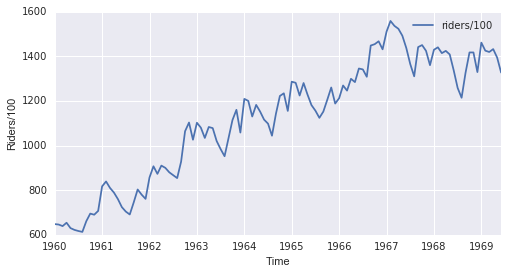

In [48]:
url = "https://raw.githubusercontent.com/welch/seasonal/master/data/TSDL/monthly-bus.12.csv"
riders = pd.read_csv(url, parse_dates=True, index_col=0)
ax = riders.plot()
ax.set_xlabel("Time")
ax.set_ylabel("Riders/100")
plt.show()

## Objectives of Time Series Analysis

* Data compression
    * Provide compact description of the data
* Explanatory -seasonal factors
    * Relationships with other variables (temperature, humidity, pollution, etc)
* Signal processing
    * Extracting a signal in the presence of noise
* Prediction
    * Use a model to predict future values of the time series


## Common Features

* Trend
    * Increasing/Decreasing
    * Linear, quadratic, etc.
* Seasonality
    * Regular periodic fluctuations
    * Monthly, daily, yearly, hourly
* Cyclical
    * Repeating swings or movements over multiple 'seasons'
    * Longer-term...
* Noise/Random
    * Erratic or residual fluctuations

Describes classical time-series decomposition...

## Classical decomposition

$$X_t = m_t + s_t + Y_t$$

* $m_t$ = trend component (slowly changing in time)
* $s_t$ = seasonal component (known period d=24(hourly), d=12(monthly))
* $T_t$ = random noise component
    * Might contain irregular cyclical components of unknown frequency + 'other stuff'

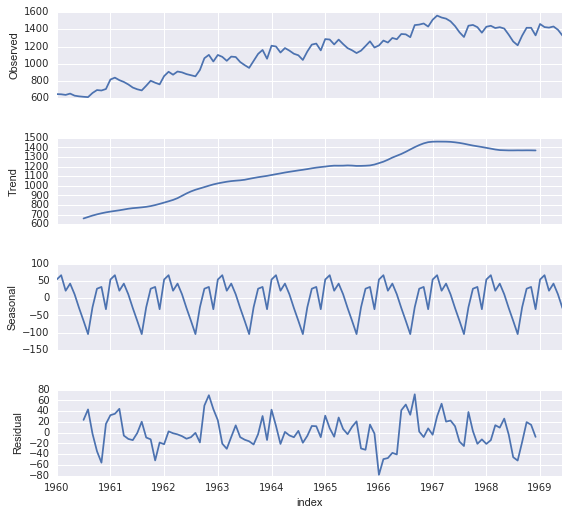

In [66]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(riders, freq=12)  
fig = decomposition.plot()
fig.set_figheight(8)
fig.set_figwidth(8)

## Common Workflow

![Time Series Analysis Process](http://www.seanabu.com/img/flowchart.png)

## Stationarize

* What does it mean for data to be stationary?
* Why is this important?

* In linear regression, we assume all observations are independent
    * In time series, we know that observations are *time dependent*

* Turns out nice results that hold for *independent* random variables
    * Law of large numbers and central limit theorem to name a couple
* Also hold for *stationary* random variables
    * Making data stationary makes it possible to apply regression techniques etc.

## Stationary Series

* There are three basic criterion for a series to be classified as "stationary".
    * While we go through them, think also how this might apply in the 2-D spatial case...

1\. The mean of the series should **not** be a function of time. The red graph below is not stationary because the mean increases over time.

![Constant Mean](http://www.seanabu.com/img/Mean_nonstationary.png)

2\. The variance of the series should **not** be a function of time. This property is known as homoscedasticity. Notice in the red graph the varying spread of data over time.

![Constant Variance](http://www.seanabu.com/img/Var_nonstationary.png)

3\. Finally, the covariance of the $i$th term and the ($i+m$)th term should **not** be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the 'red series'.

![Constant covariance](http://www.seanabu.com/img/Cov_nonstationary.png)

## Checking for Stationarity

* Lots of tests available...
    * Looking at it!
    * Dickey-Fuller test

Test Statistic   -1.536597
p-value           0.515336
dtype: float64


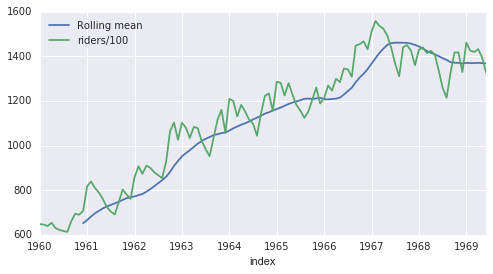

In [102]:
from statsmodels.tsa.stattools import adfuller

mean = pd.rolling_mean(riders, window=12)
mean.columns = ["Rolling mean"]
ax = mean.plot()
ax = riders.plot(ax=ax)

names = ['Test Statistic','p-value']
print(pd.Series(adfuller(riders["riders/100"], autolag='AIC')[:2], index=names))

## Non-Stationary

* Clearly our time series is not stationary
    * We likely have serial dependence
    * Certainly some non-constant variance
    * And clearly a non-constant mean...
* We'll need to perform some transformations


## Lots of Possible Transformations

* Logarithmic
* First Difference
* Seasonal Difference
* Seasonal Adjustment
* Trend Removal
* Etc...

Test Statistic   -9.258520e+00
p-value           1.427874e-15
dtype: float64


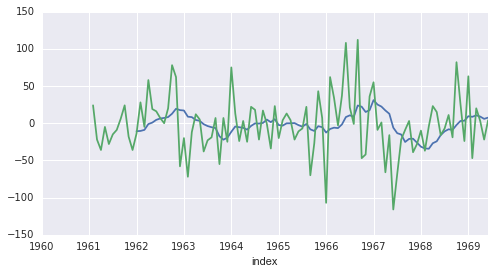

In [114]:
riders["first_diff"] = riders["riders/100"] - riders["riders/100"].shift(1)
riders["seasonal"] = riders.first_diff - riders.first_diff.shift(12)

mean = pd.rolling_mean(riders.seasonal, window=12)
mean.columns = ["Rolling mean"]
ax = mean.plot()
ax = riders.seasonal.plot(ax=ax)

names = ['Test Statistic','p-value']
print(pd.Series(adfuller(riders.seasonal.dropna(), autolag='AIC')[:2], index=names))

## Auto-correlations

* Before we finish today, we need to look at auto-correlations.
* Seasonal patterns of time series can be examined via correlograms
    * Displays graphically and numerically the autocorrelation function (ACF)
    * Once we determine the nature of the auto-correlations we use the following [rules of thumb](http://people.duke.edu/~rnau/arimrule.htm) to build a simple AR/MA/ARIMA model...
    * someday in the future!

## Self-Correlations

* ACF shows correlation of time-series with itself
    * How much the series is correlation with itself at various 'lags' $l \in {1, 2, 3..., N}$
* PACF is more complicated...
    * Since lags can have 'compounding' effects...
    * Autocorrelation controlling for previous lags
    * What does this mean?    

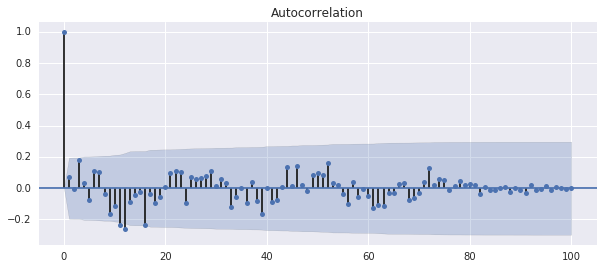

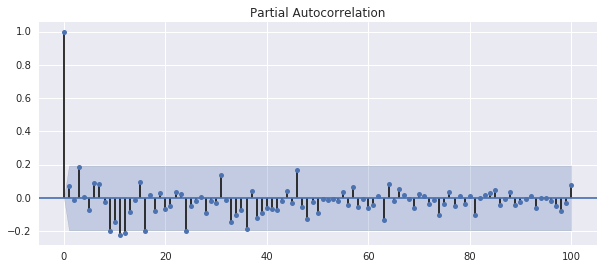

In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
rcParams['figure.figsize'] = 10, 4
ax = plot_acf(riders.seasonal.dropna())
ax = plot_pacf(riders.seasonal.dropna())

## A Note on Serial Dependence

* Serial dependency for a particular lag can be removed
    * Like before: difference the series at the corresponding lag
* Two major reasons for such transformation:
    1. Can identify hidden nature of seasonal dependencies
    2. Removing serial dependencies (helps) make the series stationary
    
Autocorrelations for consecutive lags are interdependent, so removing some of the autocorrelations will change other auto correlations, making other seasonalities more apparent.

## Testing for Serial Correlation

* Durbin-Watson statistic
    * Lies in the $0-4$ range
    * Value near 2 indicates **no** first-order serial correlation
    * Positive serial correlation DW < 2
    * Negative serial correlation DW > 2

In [119]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(riders.seasonal.dropna())  # Close to 2..?

1.8535149110388878

## Getting More Practice

More practice is always helpful! There are tons of [Scientific Python (`SciPy`)](https://www.scipy.org) materials online\*... For your reference, here is a link to a free [Whirlwind Tour of Python](http://www.oreilly.com/programming/free/files/a-whirlwind-tour-of-python.pdf) to help prepare you for doing *Data Science* in Python. While not a requirement for this course (*i.e.*, you won't be tested on this stuff), the [Jupyter Notebooks](https://github.com/jakevdp/WhirlwindTourOfPython) behind the above e-book are extremely helpful for those new to the `SciPy` ecosystem.

<br/>
<div class="alert alert-info" style="font-size:.8em;">
\* A quick Google for "Python Data Science" will get you quite far. See also the [`SciPy` conference series videos](https://www.youtube.com/playlist?list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6) and materials.
</div>